In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [218]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')

In [219]:
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*10**9
data['pan_mole']  = data['pan'] *1.01325*10**5/data['tas']*7.243*10**7*10**9

data['pt3'] = data['o3prod_mole_stacked'] - data['pt1'] - data['pt2']
data['pt7'] = data['o3loss_mole_stacked'] - data['pt4'] - data['pt5'] - data['pt6']

data['etoo_eq_mole'] = data['pt3']/data['k18']/data['no_mole']
data['isop_eq_mole'] = data['pt7']/data['k27']/data['o3_mole']

data['nox_mole'] = data['no_mole']+data['no2_mole']
data['noz_mole'] = data['hno3_mole']+data['pan_mole']
data['noy_mole'] = data['nox_mole']+data['noz_mole']

data['LER'] = data['etoo_eq_mole']/data['isop_eq_mole']
data['LER_NOx'] = data['etoo_eq_mole']/data['nox_mole']
data['LER_NOx2'] = data['isop_eq_mole']/data['nox_mole']

data['FNR_NO2'] = data['hcho_mole']/data['no2_mole']
data['FNR_NOx'] = data['hcho_mole']/data['nox_mole']
data['FNR_NOy'] = data['hcho_mole']/data['noy_mole']

data['O3_NOy'] = data['o3_mole']/data['noy_mole']
data['O3_HNO3'] = data['o3_mole']/data['hno3_mole']

data['VOC_NOx'] = data['emivoc']/data['eminox']

In [220]:
LER = data.groupby(['region']).mean()['LER']
LER_NOx = data.groupby(['region']).mean()['LER_NOx']
LER_NOx2 = data.groupby(['region']).mean()['LER_NOx2']

FNR_NO2 = data.groupby(['region']).mean()['FNR_NO2']
FNR_NOx = data.groupby(['region']).mean()['FNR_NOx']
FNR_NOy = data.groupby(['region']).mean()['FNR_NOy']

O3_NOy = data.groupby(['region']).mean()['O3_NOy']
O3_HNO3 = data.groupby(['region']).mean()['O3_HNO3']

VOC_NOx = data.groupby(['region']).mean()['VOC_NOx']

diag = pd.DataFrame(LER)
diag['LER_NOx'] = LER_NOx
diag['LER_NOx2'] = LER_NOx2
diag['FNR_NO2'] = FNR_NO2
diag['FNR_NOx'] = FNR_NOx
diag['FNR_NOy'] = FNR_NOy
diag['VOC_NOx'] = VOC_NOx
diag['O3_NOy'] = O3_NOy
diag['O3_HNO3'] = O3_HNO3

In [221]:
HOx = pd.read_csv('I8 HOx.csv')
diag['HOP'] = HOx[['HOx']].values

In [222]:
diag.to_csv('temp.csv')
diag = pd.read_csv('temp.csv')

In [223]:
sens = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/region sensitivities.csv')

In [224]:
diag = diag.merge(sens, how='left', left_on=['region'], right_on=['Region'])
diag

,region,LER,LER_NOx,LER_NOx2,FNR_NO2,FNR_NOx,FNR_NOy,VOC_NOx,O3_NOy,O3_HNO3,HOP,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2
0,AUS,0.003500,3.664202e-04,0.113999,0.442976,0.339545,0.282332,5.233270,11.123599,104.177807,0.388646,AUS,0.678558,0.138674,0.729637,0.056665,0.929994,0.7189
1,BRA,0.002365,2.417422e-02,12.517788,5.869522,4.778274,3.453524,98.626424,24.151586,453.194832,2.171545,BRA,1.039605,0.050838,0.376353,0.101639,2.762317,0.6515
2,BTH,0.000107,2.741618e-07,0.003817,0.047615,0.016951,0.015405,0.429687,0.304092,6.344929,0.011979,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649
3,CA,0.000808,1.450534e-05,0.015383,0.134980,0.087567,0.071310,1.086755,2.316263,17.759435,0.064960,CA,-0.437245,0.274061,1.664630,0.067024,-0.262668,0.8040
4,CCE,0.000468,1.937151e-04,0.106692,0.226974,0.152555,0.105618,3.022450,2.598999,14.683449,0.058930,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741
5,COD,0.001716,1.554839e-02,8.918087,5.273861,4.383426,2.704649,86.086558,16.988368,233.760075,0.914418,COD,0.388597,0.018685,0.182689,0.144989,2.127096,0.8318
6,DEU,0.000667,1.596165e-05,0.012791,0.094952,0.070207,0.054576,0.556930,2.628061,17.000702,0.100664,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560
7,FIN,0.001663,7.643561e-04,0.208258,0.455269,0.352753,0.230105,3.494706,12.748106,75.970755,0.650720,FIN,0.159276,0.331664,1.598572,0.108084,0.099636,0.7163
8,FRA,0.001783,1.447713e-04,0.058425,0.226906,0.181944,0.131786,1.932617,5.987069,31.295402,0.183551,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047
9,GBA,0.000206,3.086476e-05,0.073104,0.237045,0.140955,0.111089,2.103838,1.295822,8.572826,0.048593,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432


In [225]:
diag['ln_LER'] = np.log(diag['LER'])
diag['ln_LER_NOx'] = np.log(diag['LER_NOx'])
diag['ln_LER_NOx2'] = np.log(diag['LER_NOx2'])
diag['ln_FNR_NO2'] = np.log(diag['FNR_NO2'])
diag['ln_FNR_NOx'] = np.log(diag['FNR_NOx'])
diag['ln_FNR_NOy'] = np.log(diag['FNR_NOy'])
diag['ln_VOC_NOx'] = np.log(diag['VOC_NOx'])
diag['ln_HOP'] = np.log(diag['HOP'])

array([ 1.12036692,  1.78123397, -1.9259733 ,  0.19965528,  0.82782552,
        2.57593545, -0.66113753,  0.23481524,  0.4798228 , -0.20885376,
       -0.56063692,  2.04764189,  0.5797579 ,  1.17047793,  0.05477626,
        0.61705825,  1.89475438, -0.5399133 ,  0.04533677,  1.11324228,
        2.31498714,  1.12545622, -0.21694656,  1.0920763 ,  0.22823807,
        0.86395565])

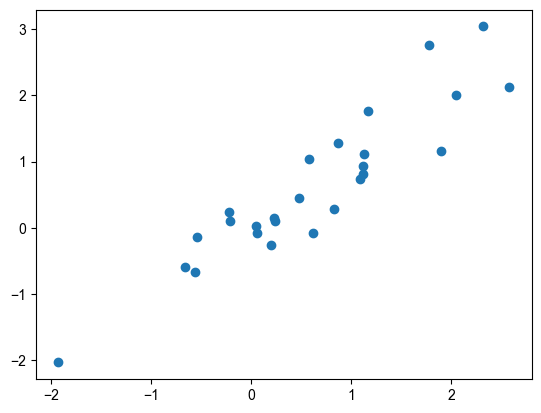

In [226]:
#mod1 = RandomForestRegressor()
mod1 = LinearRegression()
X = diag[['ln_FNR_NO2','ln_FNR_NOx','ln_FNR_NOy','ln_VOC_NOx','ln_LER_NOx','ln_LER_NOx2','ln_HOP']]
y = diag['SnSv']
mod1.fit(X,y)
y_pred = mod1.predict(X)
plt.scatter(y_pred, y)
diag['SnSv_adj']=y_pred
y_pred

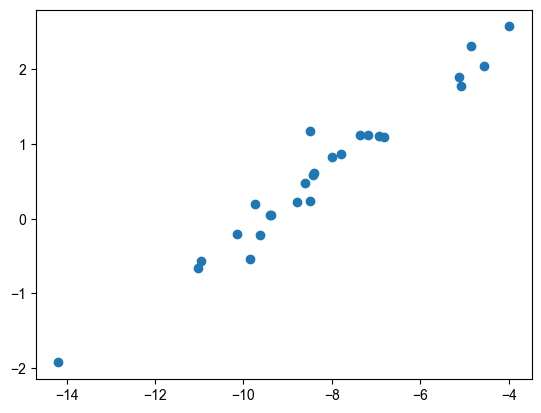

In [227]:
mod2 = LinearRegression()
#mod2 = RandomForestRegressor()
X = diag[['SnSv_adj']]
#X = diag[['SnSv_adj','ln_FNR_NO2','ln_FNR_NOx','ln_FNR_NOy','ln_VOC_NOx','ln_LER_NOx','ln_LER_NOx2','ln_HOP']]
y = diag['ln_LER_NOx']
mod2.fit(X,y)
y_pred = mod2.predict(X)

alpha=0.7
diag['ln_LER_NOx_adj'] = y_pred*alpha + diag['ln_LER_NOx']*(1-alpha)
diag['LER_NOx_adj'] = np.exp(diag['ln_LER_NOx_adj'])
plt.scatter(diag['ln_LER_NOx_adj'], diag['SnSv_adj'])

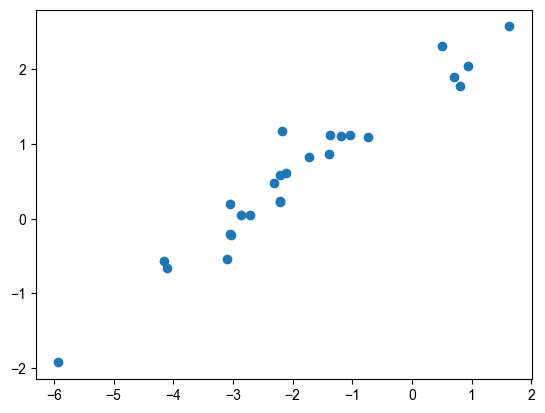

In [228]:
mod3 = LinearRegression()
#mod3 = RandomForestRegressor()
X = diag[['SnSv_adj']]
#X = diag[['SnSv_adj','ln_FNR_NO2','ln_FNR_NOx','ln_FNR_NOy','ln_VOC_NOx','ln_LER_NOx','ln_LER_NOx2','ln_HOP']]
y = diag['ln_LER_NOx2']
mod3.fit(X,y)
y_pred = mod3.predict(X)

alpha=0.7
diag['ln_LER_NOx2_adj'] = y_pred*alpha + diag['ln_LER_NOx2']*(1-alpha)
diag['LER_NOx2_adj'] = np.exp(diag['ln_LER_NOx2_adj'])
plt.scatter(diag['ln_LER_NOx2_adj'], diag['SnSv_adj'])

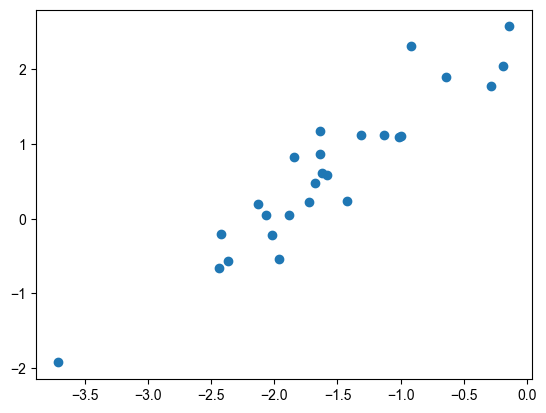

In [229]:
mod4 = LinearRegression()
#mod4 = RandomForestRegressor()
X = diag[['SnSv_adj']]
#X = diag[['SnSv_adj','ln_FNR_NO2','ln_FNR_NOx','ln_FNR_NOy','ln_VOC_NOx','ln_LER_NOx','ln_LER_NOx2','ln_HOP']]
y = diag['ln_HOP']
mod4.fit(X,y)
y_pred = mod4.predict(X)

alpha=0.7
diag['ln_HOP_adj'] = y_pred*alpha + diag['ln_HOP']*(1-alpha)
diag['HOP_adj'] = np.exp(diag['ln_HOP_adj'])
plt.scatter(diag['ln_HOP_adj'], diag['SnSv_adj'])

In [230]:
list(diag)

['region',
 'LER',
 'LER_NOx',
 'LER_NOx2',
 'FNR_NO2',
 'FNR_NOx',
 'FNR_NOy',
 'VOC_NOx',
 'O3_NOy',
 'O3_HNO3',
 'HOP',
 'Region',
 'Sn',
 'Sn_err',
 'Sv',
 'Sv_err',
 'SnSv',
 'R2',
 'ln_LER',
 'ln_LER_NOx',
 'ln_LER_NOx2',
 'ln_FNR_NO2',
 'ln_FNR_NOx',
 'ln_FNR_NOy',
 'ln_VOC_NOx',
 'ln_HOP',
 'SnSv_adj',
 'ln_LER_NOx_adj',
 'LER_NOx_adj',
 'ln_LER_NOx2_adj',
 'LER_NOx2_adj',
 'ln_HOP_adj',
 'HOP_adj']

In [231]:
diag['k_regime'] = np.sqrt(np.abs(diag['SnSv_adj']/diag['SnSv']))
diag['Sn_adj'] = diag['Sn']*diag['k_regime']
diag['Sv_adj'] = diag['Sv']/diag['k_regime']

In [191]:
new = diag[['region','Sn','Sn_err','Sv','Sv_err','Sn_adj','Sv_adj','SnSv','SnSv_adj',
            'LER_NOx','LER_NOx2','FNR_NO2','FNR_NOx','FNR_NOy','VOC_NOx',
            'ln_LER_NOx_adj','LER_NOx_adj','ln_LER_NOx2_adj','LER_NOx2_adj','ln_HOP_adj','HOP_adj']]
new

,region,Sn,Sn_err,Sv,Sv_err,Sn_adj,Sv_adj,SnSv,SnSv_adj,LER_NOx,...,FNR_NO2,FNR_NOx,FNR_NOy,VOC_NOx,ln_LER_NOx_adj,LER_NOx_adj,ln_LER_NOx2_adj,LER_NOx2_adj,ln_HOP_adj,HOP_adj
0,AUS,0.678558,0.138674,0.729637,0.056665,0.744778,0.664763,0.929994,1.120367,3.664202e-04,...,0.442976,0.339545,0.282332,5.233270,-7.352209,6.411745e-04,-1.372293,0.253525,-1.131756,0.322467
1,BRA,1.039605,0.050838,0.376353,0.101639,0.834819,0.468674,2.762317,1.781234,2.417422e-02,...,5.869522,4.778274,3.453524,98.626424,-5.079875,6.220685e-03,0.804395,2.235345,-0.281708,0.754494
2,BTH,-9.901132,0.183759,4.863086,0.174193,-9.629939,5.000038,-2.035977,-1.925973,2.741618e-07,...,0.047615,0.016951,0.015405,0.429687,-14.192869,6.856701e-07,-5.927205,0.002666,-3.714724,0.024362
3,CA,-0.437245,0.274061,1.664630,0.067024,-0.381208,1.909329,-0.262668,0.199655,1.450534e-05,...,0.134980,0.087567,0.071310,1.086755,-9.735847,5.912558e-05,-3.041840,0.047747,-2.133595,0.118411
4,CCE,0.344900,0.084865,1.208617,0.033495,0.587435,0.709613,0.285367,0.827826,1.937151e-04,...,0.226974,0.152555,0.105618,3.022450,-7.992975,3.378275e-04,-1.731722,0.176979,-1.845450,0.157954
5,COD,0.388597,0.018685,0.182689,0.144989,0.427635,0.166012,2.127096,2.575935,1.554839e-02,...,5.273861,4.383426,2.704649,86.086558,-3.991055,1.848020e-02,1.625091,5.078883,-0.139673,0.869642
6,DEU,-1.182926,0.282724,2.000965,0.089983,-1.250963,1.892137,-0.591178,-0.661138,1.596165e-05,...,0.094952,0.070207,0.054576,0.556930,-11.029927,1.620928e-05,-4.096335,0.016634,-2.437088,0.087415
7,FIN,0.159276,0.331664,1.598572,0.108084,0.244514,1.041305,0.099636,0.234815,7.643561e-04,...,0.455269,0.352753,0.230105,3.494706,-8.492461,2.050080e-04,-2.219384,0.108676,-1.424540,0.240619
8,FRA,0.466664,0.080890,1.024897,0.032964,0.479052,0.998393,0.455327,0.479823,1.447713e-04,...,0.226906,0.181944,0.131786,1.932617,-8.615121,1.813428e-04,-2.316312,0.098637,-1.680430,0.186294
9,GBA,0.147599,0.099539,1.497546,0.056190,0.214859,1.028754,0.098561,-0.208854,3.086476e-05,...,0.237045,0.140955,0.111089,2.103838,-10.137074,3.958447e-05,-3.048422,0.047434,-2.427075,0.088295


In [193]:
new.to_csv('adjusted ozone regime.csv', index=False)

#### Formal analysis

In [195]:
sens_diag = pd.read_csv('adjusted ozone regime(ver20240118).csv')

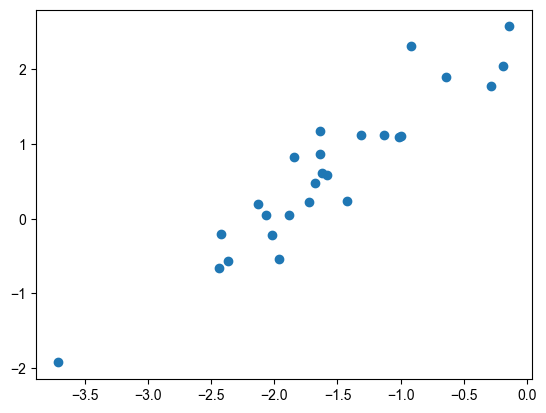

In [232]:
plt.scatter(diag['ln_HOP_adj'], diag['SnSv_adj'])

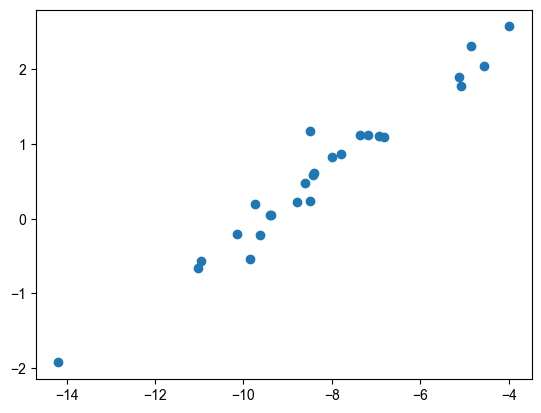

In [233]:
plt.scatter(diag['ln_LER_NOx_adj'], diag['SnSv_adj'])

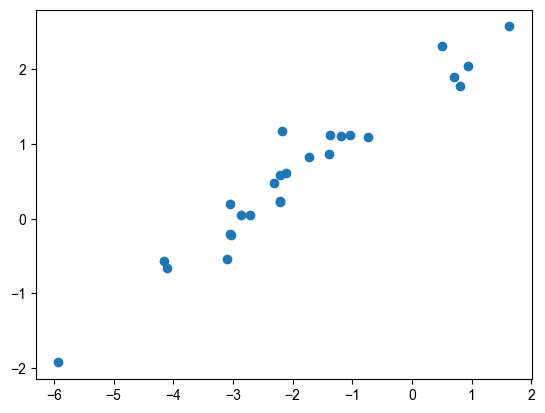

In [234]:
plt.scatter(diag['ln_LER_NOx2_adj'], diag['SnSv_adj'])

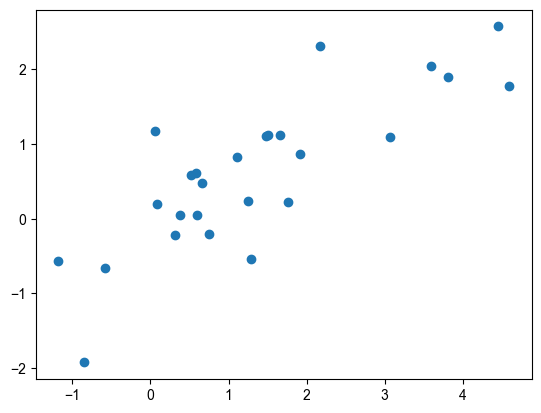

In [235]:
plt.scatter(diag['ln_VOC_NOx'], diag['SnSv_adj'])

In [236]:
r2_score(diag['ln_VOC_NOx'], diag['SnSv_adj'])

0.4128685079630676

In [237]:
diag.to_csv('unadjusted ozone regime(ver20240119).csv', index=False)

In [238]:
diag

,region,LER,LER_NOx,LER_NOx2,FNR_NO2,FNR_NOx,FNR_NOy,VOC_NOx,O3_NOy,O3_HNO3,...,SnSv_adj,ln_LER_NOx_adj,LER_NOx_adj,ln_LER_NOx2_adj,LER_NOx2_adj,ln_HOP_adj,HOP_adj,k_regime,Sn_adj,Sv_adj
0,AUS,0.003500,3.664202e-04,0.113999,0.442976,0.339545,0.282332,5.233270,11.123599,104.177807,...,1.120367,-7.352209,6.411745e-04,-1.372293,0.253525,-1.131756,0.322467,1.097590,0.744778,0.664763
1,BRA,0.002365,2.417422e-02,12.517788,5.869522,4.778274,3.453524,98.626424,24.151586,453.194832,...,1.781234,-5.079875,6.220685e-03,0.804395,2.235345,-0.281708,0.754494,0.803015,0.834819,0.468674
2,BTH,0.000107,2.741618e-07,0.003817,0.047615,0.016951,0.015405,0.429687,0.304092,6.344929,...,-1.925973,-14.192869,6.856701e-07,-5.927205,0.002666,-3.714724,0.024362,0.972610,-9.629939,5.000038
3,CA,0.000808,1.450534e-05,0.015383,0.134980,0.087567,0.071310,1.086755,2.316263,17.759435,...,0.199655,-9.735847,5.912558e-05,-3.041840,0.047747,-2.133595,0.118411,0.871840,-0.381208,1.909329
4,CCE,0.000468,1.937151e-04,0.106692,0.226974,0.152555,0.105618,3.022450,2.598999,14.683449,...,0.827826,-7.992975,3.378275e-04,-1.731722,0.176979,-1.845450,0.157954,1.703207,0.587435,0.709613
5,COD,0.001716,1.554839e-02,8.918087,5.273861,4.383426,2.704649,86.086558,16.988368,233.760075,...,2.575935,-3.991055,1.848020e-02,1.625091,5.078883,-0.139673,0.869642,1.100459,0.427635,0.166012
6,DEU,0.000667,1.596165e-05,0.012791,0.094952,0.070207,0.054576,0.556930,2.628061,17.000702,...,-0.661138,-11.029927,1.620928e-05,-4.096335,0.016634,-2.437088,0.087415,1.057516,-1.250963,1.892137
7,FIN,0.001663,7.643561e-04,0.208258,0.455269,0.352753,0.230105,3.494706,12.748106,75.970755,...,0.234815,-8.492461,2.050080e-04,-2.219384,0.108676,-1.424540,0.240619,1.535162,0.244514,1.041305
8,FRA,0.001783,1.447713e-04,0.058425,0.226906,0.181944,0.131786,1.932617,5.987069,31.295402,...,0.479823,-8.615121,1.813428e-04,-2.316312,0.098637,-1.680430,0.186294,1.026546,0.479052,0.998393
9,GBA,0.000206,3.086476e-05,0.073104,0.237045,0.140955,0.111089,2.103838,1.295822,8.572826,...,-0.208854,-10.137074,3.958447e-05,-3.048422,0.047434,-2.427075,0.088295,1.455690,0.214859,1.028754
